In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.cluster import hierarchy
from sklearn import cluster

In [147]:
df1 = pd.read_csv("search_results_new.csv",header=None,names=["query","id","username"])
df2 = pd.read_csv("search_results_new2.csv",header=None,names=["query","id","username"])
df3 = pd.read_csv("search_results_new3.csv",header=None,names=["query","id","username"])

df = pd.concat([df1,df2,df3])
df = df.reset_index(drop=True)
df = df.to_csv("search_results_freesound_api_until_whistling.csv")

In [72]:
df

,query,id,username
0,airplane noise,414976,InspectorJ
1,airplane noise,581440,hard_dealer
2,airplane noise,624675,avreference
3,airplane noise,249439,blaukreuz
4,airplane noise,22115,Charel Sytze
...,...,...,...
29345,whistling,495339,kirkpatrick.live
29346,whistling,495342,kirkpatrick.live
29347,whistling,495341,kirkpatrick.live
29348,whistling,495344,kirkpatrick.live


In [73]:
list_id_one_user = np.unique(df.groupby("username").sample(n=1, random_state=0)["id"])
one_user_i = [i for i in range(len(df["id"])) if df["id"][i] in list_id_one_user]

df_one_user = df.iloc[one_user_i]

In [95]:
list_id_one_user

array([    80,    151,    305, ..., 630488, 631393, 631547], dtype=int64)

In [74]:
df_count = df.groupby("query").count()
df_count = df_count.reset_index()
df_count

,query,id,username
0,airplane noise,287,287
1,animal eating,178,178
2,apple crunching,115,115
3,belching,125,125
4,bird chirps,1005,1005
...,...,...,...
83,train noise,1005,1005
84,underwater,899,899
85,vomit,73,73
86,wheezing,95,95


In [75]:
df_one_user_count = df_one_user.groupby("query").count()
df_one_user_count = df_one_user_count.reset_index()
df_one_user_count

,query,id,username
0,airplane noise,80,80
1,animal eating,56,56
2,apple crunching,22,22
3,belching,39,39
4,bird chirps,300,300
...,...,...,...
81,train noise,182,182
82,underwater,205,205
83,vomit,26,26
84,wheezing,14,14


In [98]:
search_results_df = df_one_user

In [240]:
first_pair = []
second_pair = []
n_together = []
norm_n_together = []
b_norm_n_together = []
to_divide = []
first = True
total_counts = search_results_df.groupby("id").count()
list_queries = search_results_df["query"].unique()
for first_p in list_queries:
    for second_p in list_queries:
        subset = (first_p, second_p)
        _df = search_results_df[search_results_df["query"].isin(subset)]
        counts = _df.groupby("id").count()
        first_df = search_results_df[search_results_df["query"].isin([first_p])]
        first_counts = first_df.groupby("id").count()
        second_df = search_results_df[search_results_df["query"].isin([second_p])]
        second_counts = second_df.groupby("id").count()
        counted_multiple = len(counts[counts["query"] > 1])
        if first:
            print(subset)
            first = False
        first_pair.append(subset[0])
        second_pair.append(subset[1])
        if first_p==second_p:
            n_together.append(len(counts))
            norm_n_together.append(1)
            b_norm_n_together.append(1)
        else:
            n_together.append(counted_multiple)
            # P(A|B) = (P(B|A)P(A))/P(B)
            # P(B|A) = P(B,)
            norm_n_together.append(counted_multiple/len(counts))
            b_norm_n_together.append(counted_multiple/len(counts))

('airplane noise', 'airplane noise')


In [241]:
subset = ("birds", "bird chirps")
_df = search_results_df[search_results_df["query"].isin(subset)]
_df

,query,id,username
710,bird chirps,403317,straget
713,bird chirps,584589,invertedturtle
720,bird chirps,187687,Sonic-ranger
723,bird chirps,344426,munyeca
725,bird chirps,578301,Yikescloud
...,...,...,...
2706,birds,494559,mrsorbias
2709,birds,498388,16FVolejnikovaA
2710,birds,266438,Adrianac
2711,birds,517060,bartoszmatenko


In [256]:
together_df = pd.DataFrame({"first_pair":first_pair,
                           "second_pair":second_pair,
                           "n_together":norm_n_together})

In [257]:
for_clust_df = together_df.pivot(index="first_pair", columns="second_pair", values="n_together")

In [258]:
for_clust_df.to_csv("for_clust3.csv")

In [259]:
a = np.array(for_clust_df)
a_diag = np.diag(a)
temp = a.copy()
np.fill_diagonal(temp, 0)
n_matches = np.nansum(temp,axis=0)
terms = for_clust_df.columns
terms_with_matches = terms[(n_matches > 0)]
new_df = for_clust_df.loc[terms_with_matches,terms_with_matches]
new_a = np.array(new_df)
new_a_diag = np.diag(new_df)
for_dist_a = -1*new_a #+ np.nanmax(new_a) + 1
np.fill_diagonal(for_dist_a, 0)
for_dist = for_dist_a + -1*np.nanmin(for_dist_a) + np.min(np.diff(np.unique(for_dist_a)))
np.fill_diagonal(for_dist, 0)
dist = for_dist

#dist = for_dist/(np.diag(for_dist)) - 1
# need to improve normalization
#to_divide = np.max(np.sum(dist,axis=0))
#dist = dist/to_divide

In [260]:
np.nanmin(for_dist_a)

-1.0

In [261]:
n_matches

array([ 0.75774728,  1.3400802 ,  1.22106068,  1.0079599 ,  0.47542096,
        0.59533375,  1.24064348,  1.13664328,  0.65965506,  1.17294866,
        1.33904577,  1.39941428,  1.2711941 ,  0.77790421,  0.79768849,
        0.38655551,  1.0097077 ,  0.67133709,  1.10791795,  1.12076457,
        0.94053635,  1.25144834,  1.03264087,  1.14705882,  1.19682598,
        1.32785738,  0.70766091,  1.22175167,  1.1477962 ,  1.18206596,
        1.25782105,  1.20264996,  1.06076041,  0.71567136,  0.97043257,
        1.11315974,  1.14705882,  0.44634869,  0.94477375, 10.06607174,
        1.12977886,  1.2974242 ,  0.90326483,  1.04820014,  0.577438  ,
        1.05479792,  1.21834406,  1.15291155,  0.50914596,  1.06242636,
        1.31957134,  0.96716911,  0.50895263,  0.4196865 ,  2.26739473,
        1.55651368,  1.32567868,  1.08175698,  1.09213918,  1.17970269,
        1.12282878,  0.91455291,  1.11705607,  0.52772536,  0.40603147,
        1.00452109,  2.26739473,  0.85341547,  1.00380249,  1.24

In [262]:
np.diag(dist)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [263]:
dist = np.log(dist+1)

In [264]:
terms_with_matches

Index(['airplane noise', 'animal eating', 'apple crunching', 'belching',
       'bird chirps', 'birds', 'blowing nose', 'breath running', 'breathing',
       'cat eating', 'chewing', 'chewing gum', 'chomping', 'clapping',
       'clicking', 'clock ticking', 'copy machine', 'cough', 'cow eating',
       'crinkling paper', 'crunching', 'crunching chips', 'distant engines',
       'distorted guitar dissonance', 'dog chewing bone', 'dog drinking water',
       'drinking', 'eating', 'eating a carrot', 'eating cereal',
       'eating noodles', 'eating salad', 'feet shuffling', 'finger snapping',
       'finger tapping', 'foot tapping', 'fork scratch plate', 'fountain',
       'gargling', 'gasping', 'gulping', 'gum popping', 'hands rubbing',
       'hard breathing', 'harp', 'hiccuping', 'high-pitched crunch',
       'horse munching', 'keyboard', 'keyboard clicking', 'knife hit glass',
       'knuckle cracking', 'lake', 'laugh', 'lip smacking',
       'loud mouth sounds', 'mouth breathing', 'm

In [265]:
n_matches

array([ 0.75774728,  1.3400802 ,  1.22106068,  1.0079599 ,  0.47542096,
        0.59533375,  1.24064348,  1.13664328,  0.65965506,  1.17294866,
        1.33904577,  1.39941428,  1.2711941 ,  0.77790421,  0.79768849,
        0.38655551,  1.0097077 ,  0.67133709,  1.10791795,  1.12076457,
        0.94053635,  1.25144834,  1.03264087,  1.14705882,  1.19682598,
        1.32785738,  0.70766091,  1.22175167,  1.1477962 ,  1.18206596,
        1.25782105,  1.20264996,  1.06076041,  0.71567136,  0.97043257,
        1.11315974,  1.14705882,  0.44634869,  0.94477375, 10.06607174,
        1.12977886,  1.2974242 ,  0.90326483,  1.04820014,  0.577438  ,
        1.05479792,  1.21834406,  1.15291155,  0.50914596,  1.06242636,
        1.31957134,  0.96716911,  0.50895263,  0.4196865 ,  2.26739473,
        1.55651368,  1.32567868,  1.08175698,  1.09213918,  1.17970269,
        1.12282878,  0.91455291,  1.11705607,  0.52772536,  0.40603147,
        1.00452109,  2.26739473,  0.85341547,  1.00380249,  1.24

In [266]:
a

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [267]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    hierarchy.dendrogram(linkage_matrix, **kwargs)

In [268]:
model = cluster.AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(dist)

C:\Users\danie\anaconda3\envs\miso\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


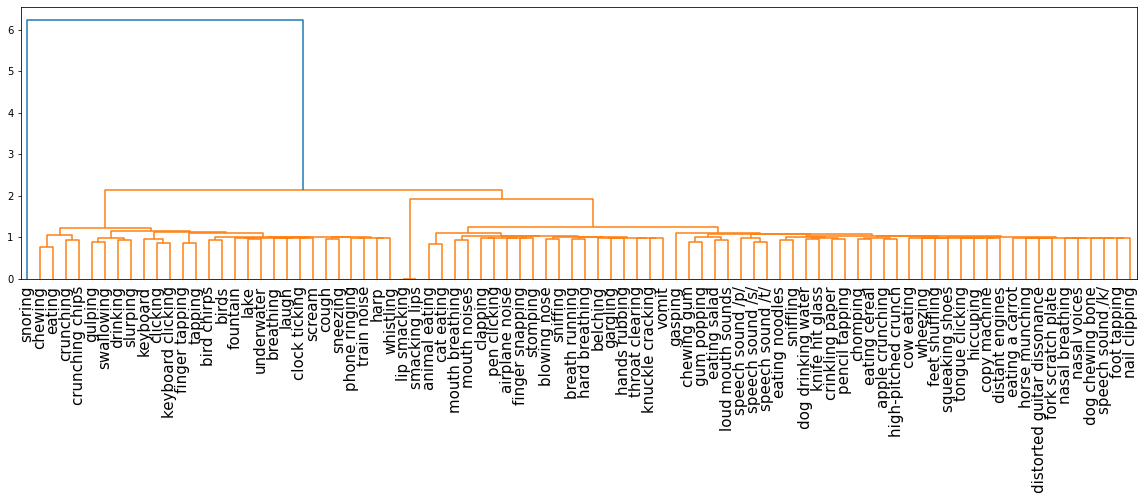

In [269]:
plt.rcParams["figure.figsize"] = (20,5)
plt.rcParams["font.size"] = 10

plt.figure()
dn = plot_dendrogram(model, labels=new_df.columns)
plt.xticks(rotation=90)
plt.xticks(fontsize = 15)
plt.show()